In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full), (X_test,y_test)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
# 훈련 세트의 일부분을 검증 세트로 만들고 입력 특성의 스케일을 0~1 사이 범위로 조정하기
X_valid, X_train = X_train_full[:5000]/255.0 , X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [6]:
# 클래스 이름
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [7]:
# MLP model 만들기
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28], name='flatten'),
                                 keras.layers.Dense(300,activation='relu', name='hidden1'),
                                 keras.layers.Dense(100, activation='relu', name='hidden2'),
                                 keras.layers.Dense(10, activation='softmax', name='output')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 300)               235500    
_________________________________________________________________
hidden2 (Dense)              (None, 100)               30100     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


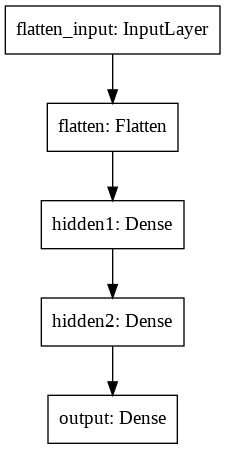

In [8]:
# 모델 구조 시각화
keras.utils.plot_model(model)

In [9]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history= model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9756 - accuracy: 0.6852 - val_loss: 0.5033 - val_accuracy: 0.8340
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4989 - accuracy: 0.8272 - val_loss: 0.4487 - val_accuracy: 0.8468
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4458 - accuracy: 0.8435 - val_loss: 0.4691 - val_accuracy: 0.8298
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4190 - accuracy: 0.8523 - val_loss: 0.3954 - val_accuracy: 0.8630
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3959 - accuracy: 0.8604 - val_loss: 0.3835 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3797 - accuracy: 0.8677 - val_loss: 0.3735 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3643 - accuracy: 0.8703 - val_loss: 0.3712 - val_accuracy:

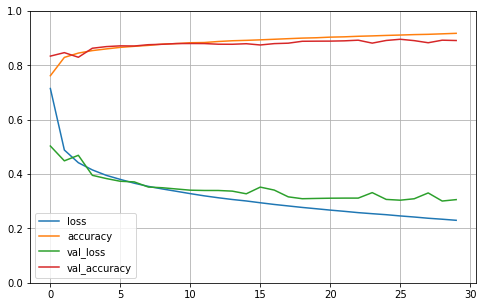

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [11]:
# 검증이 끝나고, 테스트 세트로 모델을 평가하여 일반화 오차를 추정한다. 
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3309 - accuracy: 0.8836


[0.3309383988380432, 0.8835999965667725]

In [12]:
# predict()를 이용해 새로운 샘플에 대해 예측을 만든다.
# test 세트 처음 3개를 새로운 샘플로 간주
import numpy as np
X_new = X_test[:3]
y_prob = model.predict(X_new)
print(y_prob.round(2))
y_pred = np.argmax(model.predict(X_new), axis=-1)
np.array(class_names)[y_pred]


[[0.   0.   0.   0.   0.   0.01 0.   0.01 0.   0.99]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

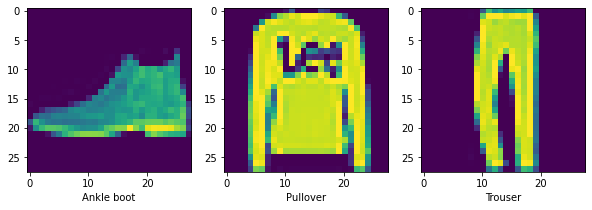

In [13]:
# 천유정 1813128
plt.figure(figsize=(10,10))
for img in range(3):
  plt.subplot(1,3,img+1)
  plt.grid(False)
  plt.imshow(X_new[img])
  plt.xlabel(class_names[y_pred[img]])